<a href="https://colab.research.google.com/github/Ash-Twin/LeidenIDL2023/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn[plot]
!pip install holoviews=1.12.7
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=d1d176a723b20354fe225c00f80cfe46d6dc3967576fae76606c24554c26db48
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=049f6763c9aa26e3d52ae1007c5cf6272b4330c225447ad8b57aa0f1629d295c
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for data

In [18]:
# Load the MNIST data
mount_root = 'https://github.com/Ash-Twin/LeidenIDL2023/'
train_in = pd.read_csv(mount_root+'train_in.csv', header=None)
train_out = pd.read_csv(mount_root+'train_out.csv', header=None)
test_in = pd.read_csv(mount_root+'test_in.csv', header=None)
test_out = pd.read_csv(mount_root+'test_out.csv', header=None)

In [28]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

# Calculate the centers for each digit class
centers = []
for digit in range(10):
    digit_images = train_in[train_out[0] == digit]
    center = digit_images.mean(axis=0)
    centers.append(center)

# Calculate distances between centers
distances = np.zeros((10, 10))

for i in range(10):
    for j in range(i+1, 10):
        dist = distance.euclidean(centers[i], centers[j])
        distances[i, j] = dist
        distances[j, i] = dist

# Function to classify a new image based on the nearest center
def classify_image(image):
    min_distance = float('inf')
    predicted_digit = None
    for digit in range(10):
        dist = distance.euclidean(image, centers[digit])
        if dist < min_distance:
            min_distance = dist
            predicted_digit = digit
    return predicted_digit

# Classify test images and calculate accuracy
correct_predictions = 0
total_images = test_in.shape[0]
for i in range(total_images):
    test_image = test_in.iloc[i, :].values
    true_label = test_out.iloc[i, 0]
    predicted_label = classify_image(test_image)
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_images
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 80.40%


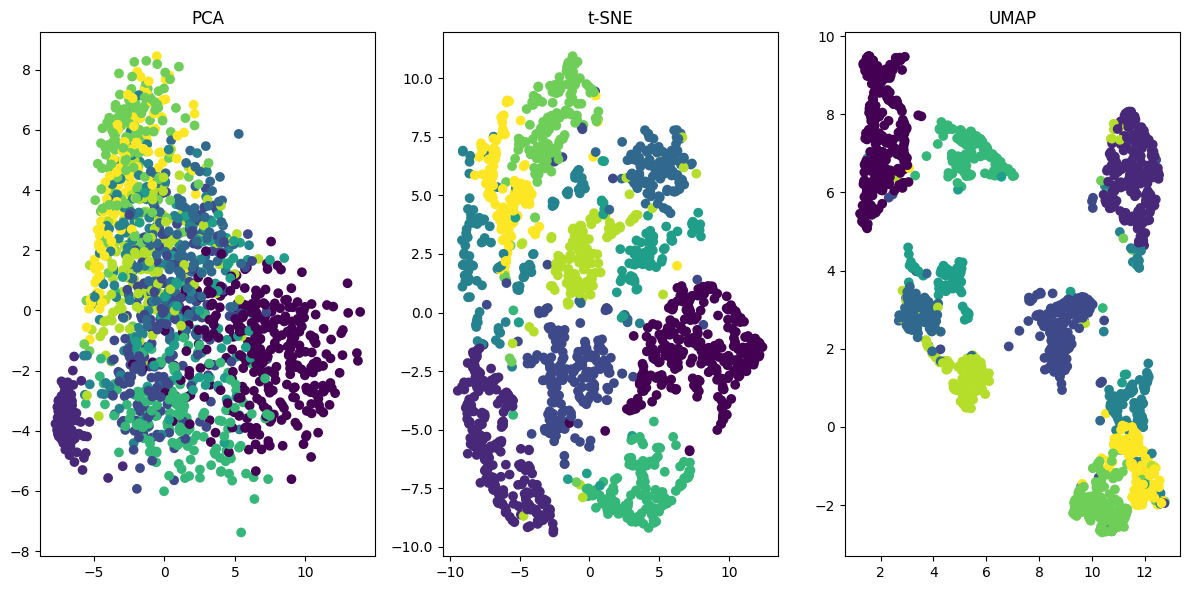

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Combine input and output data
mnist_data = pd.concat([train_in, train_out], axis=1)

# Extract labels and features
labels = mnist_data.iloc[:, -1]
features = mnist_data.iloc[:, :-1]

# Perform PCA dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(features)

# Perform umap
ump = umap.UMAP()
ump_result = ump.fit_transform(features)
# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap=plt.colormaps['viridis'])
plt.title('PCA')

plt.subplot(132)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap=plt.colormaps['viridis'])
plt.title('t-SNE')

plt.subplot(133)
plt.scatter(ump_result[:, 0],ump_result[:, 1],c=labels,cmap=plt.colormaps['viridis'])
plt.title('UMAP')

plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import accuracy_score

class NearestMeanClassifier:
    def __init__(self):
        self.class_means = None

    def fit(self, X, y):
        unique_classes = np.unique(y)
        self.class_means = {}

        for c in unique_classes:
            class_mean = np.mean(X[y == c], axis=0)
            self.class_means[c] = class_mean

    def predict(self, X):
        if self.class_means is None:
            raise ValueError("Classifier not trained. Please use the 'fit' method first.")

        predictions = []
        for sample in X:
            distances = {c: np.linalg.norm(sample - mean) for c, mean in self.class_means.items()}
            predicted_class = min(distances, key=distances.get)
            predictions.append(predicted_class)

        return np.array(predictions)

nm_classifier = NearestMeanClassifier()
nm_classifier.fit(train_in,train_out)
nm_pred = nm_classifier.predict(test_in)
# accuracy = accuracy_score(test_out,nm_pred)
# print(f"Accuracy of Nearest Mean Classifier: {accuracy * 100:.2f}%")

ValueError: ignored

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_in,train_out.values.ravel())
knn_pred = knn_classifier.predict(test_in)
knn_accuracy = accuracy_score(test_out,knn_pred)

print(f"Accuracy of KNN Classifier: {knn_accuracy * 100:.2f}%")

Accuracy of Nearest Mean Classifier: 91.40%


<Axes: >

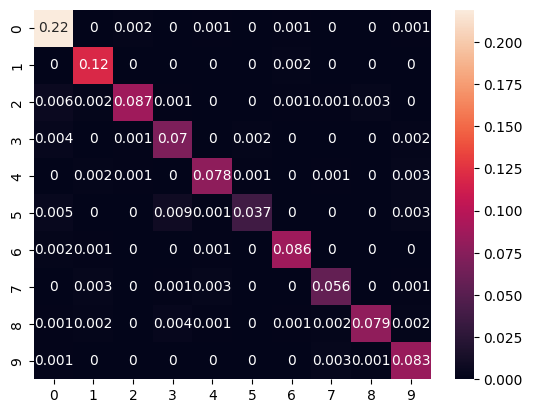

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(test_out,knn_pred)
sns.heatmap(cfm/np.sum(cfm), annot=True)